In [1]:
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

####  distance_matrix: An array of distances between locations on meters.
#### num_locations: The number of locations.
#### num_vehicles: The number of vehicles in the fleet.
#### depot: The index of the depot, the location where all vehicles start and end their routes.

In [104]:
original_list = [[4.17022005e-01, 7.20324493e-01],
 [1.14374817e-04, 3.02332573e-01],
 [1.46755891e-01, 9.23385948e-02],
 [1.86260211e-01, 3.45560727e-01],
 [3.96767474e-01, 5.38816734e-01],
 [4.19194514e-01, 6.85219500e-01],
 [2.04452250e-01, 8.78117436e-01],
 [2.73875932e-02, 6.70467510e-01],
 [4.17304802e-01, 5.58689828e-01],
 [1.40386939e-01, 1.98101489e-01],
 [8.00744569e-01, 9.68261576e-01]]

In [105]:
rounded_list = [[int((round(element*100, 2))) for element in row] for row in original_list]
rounded_list

[[41, 72],
 [0, 30],
 [14, 9],
 [18, 34],
 [39, 53],
 [41, 68],
 [20, 87],
 [2, 67],
 [41, 55],
 [14, 19],
 [80, 96]]

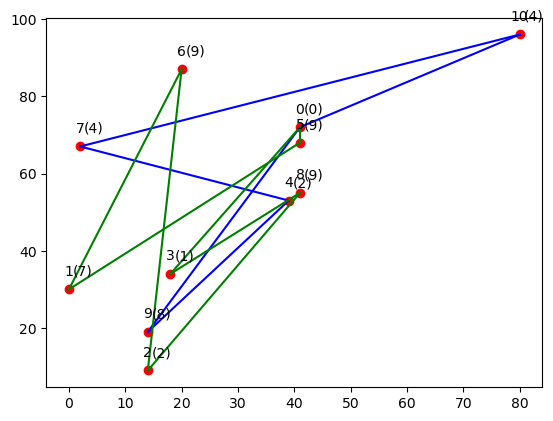

In [106]:
import matplotlib.pyplot as plt

points = rounded_list
routes = [[0, 10, 7, 4, 9, 0], [0, 5, 1, 6, 2, 8, 3, 0]]
data = [0, 7, 2, 1, 2, 9, 9, 4, 9, 8, 4]

x, y = zip(*points)

plt.scatter(x, y, color='red', marker='o')
route_colors = ['blue', 'green', 'red', 'purple', 'orange']

for index,route in enumerate(routes):
    color = route_colors[index % len(route_colors)] 

    for i in range(len(route) - 1):
        plt.plot([x[route[i]], x[route[i + 1]]], [y[route[i]], y[route[i + 1]]], color=color)

    plt.plot([x[route[-1]], x[route[0]]], [y[route[-1]], y[route[0]]], color='blue')

for i, txt in enumerate(range(len(x))):
    plt.annotate(txt, (x[i], y[i]), textcoords="offset points", xytext=(0, 10), ha='center')
    
    
for i, txt in enumerate(data):
    plt.annotate(f"({txt})", (x[i], y[i]), textcoords="offset points", xytext=(10, 10), ha='center')



plt.show()


In [86]:
points = [[3, 2], [5, 2], [7, 5]]
route = [0, 1, 2]

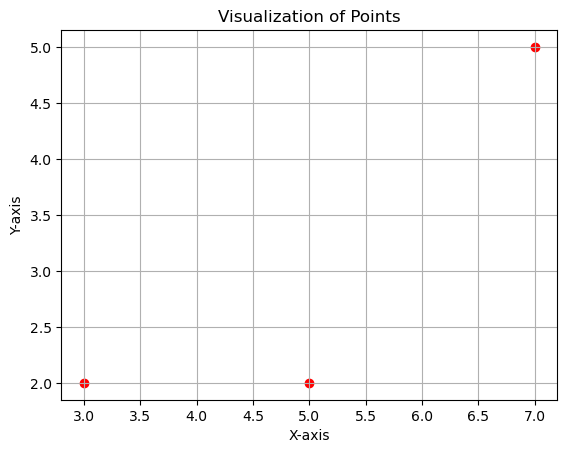

In [31]:
import matplotlib.pyplot as plt

points = [[3, 2], [5, 2], [7, 5]]

# Extract x and y coordinates
x_coordinates = [point[0] for point in points]
y_coordinates = [point[1] for point in points]

# Plot the points
plt.scatter(x_coordinates, y_coordinates, color='red', marker='o')

# Add labels and title
plt.title('Visualization of Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
# Show the plot
plt.show()


In [78]:
def manhattan_distance(point1, point2):
    return abs(point1[0] - point2[0]) + abs(point1[1] - point2[1])

def creating_matrix(points):
    # Inicjalizacja macierzy odległości zerami
    distance_matrix = [[0 for _ in range(len(points))] for _ in range(len(points))]

    # Wypełnianie macierzy odległości
    for i in range(len(points)):
        for j in range(len(points)):
            distance_matrix[i][j] = manhattan_distance(points[i], points[j])
    return distance_matrix

### start for paper

In [107]:
matrix = [[0.0, 0.4982277666245181, 0.6926181965764218, 0.33434392061513746, 0.46455120140254047, 0.4174101636768946, 0.4819701198732224, 0.887455679774195, 0.3155211043934614, 0.45645462331037057, 0.6464014529614673], [0.4982277666245181, 0.0, 0.604948136048316, 0.2833689854078848, 0.3776549122375437, 0.21475161340238, 0.40198804782231906, 0.41639672835515934, 0.35246638468260727, 0.2699601629712241, 0.17937765393715305], [0.6926181965764218, 0.604948136048316, 0.0, 0.416352256046198, 0.25861833635088816, 0.7675664443888833, 0.2333875053981681, 0.637999276571085, 0.3932048881422066, 0.8350866947413864, 0.5478030553345149], [0.33434392061513746, 0.2833689854078848, 0.416352256046198, 0.0, 0.15832122767161932, 0.37220063456124086, 0.18301246339720603, 0.5849585892702321, 0.06925685691398771, 0.43929290552248984, 0.36167583829450134], [0.46455120140254047, 0.3776549122375437, 0.25861833635088816, 0.15832122767161932, 0.0, 0.5149969826078292, 0.026159319937695522, 0.5602156539951759, 0.1493005461081646, 0.5827715536015479, 0.3828393692530899], [0.4174101636768946, 0.21475161340238, 0.7675664443888833, 0.37220063456124086, 0.5149969826078292, 0.0, 0.5411545659069962, 0.6146523453267771, 0.427997886759541, 0.06777468439410708, 0.39027499893264667], [0.4819701198732224, 0.40198804782231906, 0.2333875053981681, 0.18301246339720603, 0.026159319937695522, 0.5411545659069962, 0.0, 0.5695823451906108, 0.16835036173993917, 0.6089290595196201, 0.4003138751272442], [0.887455679774195, 0.41639672835515934, 0.637999276571085, 0.5849585892702321, 0.5602156539951759, 0.6146523453267771, 0.5695823451906108, 0.0, 0.6416550833359702, 0.6523594359524124, 0.24340601458436112], [0.3155211043934614, 0.35246638468260727, 0.3932048881422066, 0.06925685691398771, 0.1493005461081646, 0.427997886759541, 0.16835036173993917, 0.6416550833359702, 0.0, 0.4938439498035823, 0.42551237849042206], [0.45645462331037057, 0.2699601629712241, 0.8350866947413864, 0.43929290552248984, 0.5827715536015479, 0.06777468439410708, 0.6089290595196201, 0.6523594359524124, 0.4938439498035823, 0.0, 0.4387392845041575], [0.6464014529614673, 0.17937765393715305, 0.5478030553345149, 0.36167583829450134, 0.3828393692530899, 0.39027499893264667, 0.4003138751272442, 0.24340601458436112, 0.42551237849042206, 0.4387392845041575, 0.0]]

In [108]:
len(matrix)

11

In [109]:
def float_to_int(z):
    for i, x in enumerate(z):
        for ii, y in enumerate(x):
            
            z[i][ii] = int(y *100)
    return z


In [110]:
matrix_dist = float_to_int(matrix)
matrix_dist

[[0, 49, 69, 33, 46, 41, 48, 88, 31, 45, 64],
 [49, 0, 60, 28, 37, 21, 40, 41, 35, 26, 17],
 [69, 60, 0, 41, 25, 76, 23, 63, 39, 83, 54],
 [33, 28, 41, 0, 15, 37, 18, 58, 6, 43, 36],
 [46, 37, 25, 15, 0, 51, 2, 56, 14, 58, 38],
 [41, 21, 76, 37, 51, 0, 54, 61, 42, 6, 39],
 [48, 40, 23, 18, 2, 54, 0, 56, 16, 60, 40],
 [88, 41, 63, 58, 56, 61, 56, 0, 64, 65, 24],
 [31, 35, 39, 6, 14, 42, 16, 64, 0, 49, 42],
 [45, 26, 83, 43, 58, 6, 60, 65, 49, 0, 43],
 [64, 17, 54, 36, 38, 39, 40, 24, 42, 43, 0]]

In [120]:
"""Capacited Vehicles Routing Problem (CVRP)."""
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp


def create_data_model():
    """Stores the data for the problem."""
    data = {}
    data["distance_matrix"] =  matrix_dist
    data["demands"] = [0, 7, 2, 1, 2, 9, 9, 4, 9, 8, 4]
    data["vehicle_capacities"] = [20, 20, 20, 20]
    data["num_vehicles"] = 4
    data["depot"] = 0
    return data

In [121]:
def print_solution(data, manager, routing, solution):
    """Prints solution on console."""
    print(f"Objective: {solution.ObjectiveValue()}")
    total_distance = 0
    total_load = 0
    for vehicle_id in range(data["num_vehicles"]):
        index = routing.Start(vehicle_id)
        plan_output = f"Route for vehicle {vehicle_id}:\n"
        route_distance = 0
        route_load = 0
        while not routing.IsEnd(index):
            node_index = manager.IndexToNode(index)
            route_load += data["demands"][node_index]
            plan_output += f" {node_index} Load({route_load}) -> "
            previous_index = index
            index = solution.Value(routing.NextVar(index))
            route_distance += routing.GetArcCostForVehicle(
                previous_index, index, vehicle_id
            )
        plan_output += f" {manager.IndexToNode(index)} Load({route_load})\n"
        plan_output += f"Distance of the route: {route_distance}m\n"
        plan_output += f"Load of the route: {route_load}\n"
        print(plan_output)
        total_distance += route_distance
        total_load += route_load
    print(f"Total distance of all routes: {total_distance}m")
    print(f"Total load of all routes: {total_load}")


In [122]:
def main():
    """Solve the CVRP problem."""
    # Instantiate the data problem.
    data = create_data_model()

    # Create the routing index manager.
    manager = pywrapcp.RoutingIndexManager(
        len(data["distance_matrix"]), data["num_vehicles"], data["depot"]
    )

    # Create Routing Model.
    routing = pywrapcp.RoutingModel(manager)

    # Create and register a transit callback.
    def distance_callback(from_index, to_index):
        """Returns the distance between the two nodes."""
        # Convert from routing variable Index to distance matrix NodeIndex.
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data["distance_matrix"][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    # Define cost of each arc.
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # Add Capacity constraint.
    def demand_callback(from_index):
        """Returns the demand of the node."""
        # Convert from routing variable Index to demands NodeIndex.
        from_node = manager.IndexToNode(from_index)
        return data["demands"][from_node]

    demand_callback_index = routing.RegisterUnaryTransitCallback(demand_callback)
    routing.AddDimensionWithVehicleCapacity(
        demand_callback_index,
        0,  # null capacity slack
        data["vehicle_capacities"],  # vehicle maximum capacities
        True,  # start cumul to zero
        "Capacity",
    )

    # Setting first solution heuristic.
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC
    )
    search_parameters.local_search_metaheuristic = (
        routing_enums_pb2.LocalSearchMetaheuristic.GUIDED_LOCAL_SEARCH
    )
    search_parameters.time_limit.FromSeconds(1)

    # Solve the problem.
    solution = routing.SolveWithParameters(search_parameters)

    # Print solution on console.
    if solution:
        print_solution(data, manager, routing, solution)


In [123]:
main()

Objective: 413
Route for vehicle 0:
 0 Load(0) ->  1 Load(7) ->  10 Load(11) ->  7 Load(15) ->  2 Load(17) ->  4 Load(19) ->  3 Load(20) ->  0 Load(20)
Distance of the route: 226m
Load of the route: 20

Route for vehicle 1:
 0 Load(0) ->  5 Load(9) ->  9 Load(17) ->  0 Load(17)
Distance of the route: 92m
Load of the route: 17

Route for vehicle 2:
 0 Load(0) ->  0 Load(0)
Distance of the route: 0m
Load of the route: 0

Route for vehicle 3:
 0 Load(0) ->  8 Load(9) ->  6 Load(18) ->  0 Load(18)
Distance of the route: 95m
Load of the route: 18

Total distance of all routes: 413m
Total load of all routes: 55


In [119]:
sol = [[0, 1, 10, 7, 2, 6, 0], [0, 3, 4, 8, 0], [0, 5, 9, 0]] 417

### time limit for searching

In [20]:
search_parameters = pywrapcp.DefaultRoutingSearchParameters()
search_parameters.time_limit.seconds = 60

In [44]:
"""Capacited Vehicles Routing Problem (CVRP)."""

from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp


def create_data_model():
    """Stores the data for the problem."""
    data = {}
    data["distance_matrix"] = [[0, 42, 30, 63, 27, 53, 57, 79, 62, 41, 7],
 [42, 0, 16, 39, 30, 11, 42, 50, 30, 46, 37],
 [30, 16, 0, 36, 13, 28, 33, 51, 46, 49, 27],
 [63, 39, 36, 0, 36, 42, 12, 16, 66, 83, 63],
 [27, 30, 13, 36, 0, 41, 29, 53, 59, 57, 28],
 [53, 11, 28, 42, 41, 0, 48, 50, 23, 50, 47],
 [57, 42, 33, 12, 29, 48, 0, 27, 71, 83, 58],
 [79, 50, 51, 16, 53, 50, 27, 0, 73, 96, 78],
 [62, 30, 46, 66, 59, 23, 71, 73, 0, 41, 55],
 [41, 46, 49, 83, 57, 50, 83, 96, 41, 0, 34],
 [7, 37, 27, 63, 28, 47, 58, 78, 55, 34, 0]],
    
    data["demands"] = [0, 4, 3, 1, 5, 3, 5, 2, 8, 9, 3]
    data["vehicle_capacities"] = [20, 20, 20, 20]
    data["num_vehicles"] = 4
    data["depot"] = 0
    return data


def print_solution(data, manager, routing, solution):
    """Prints solution on console."""
    print(f"Objective: {solution.ObjectiveValue()}")
    total_distance = 0
    total_load = 0
    for vehicle_id in range(data["num_vehicles"]):
        index = routing.Start(vehicle_id)
        plan_output = f"Route for vehicle {vehicle_id}:\n"
        route_distance = 0
        route_load = 0
        while not routing.IsEnd(index):
            node_index = manager.IndexToNode(index)
            route_load += data["demands"][node_index]
            plan_output += f" {node_index} Load({route_load}) -> "
            previous_index = index
            index = solution.Value(routing.NextVar(index))
            route_distance += routing.GetArcCostForVehicle(
                previous_index, index, vehicle_id
            )
        plan_output += f" {manager.IndexToNode(index)} Load({route_load})\n"
        plan_output += f"Distance of the route: {route_distance}m\n"
        plan_output += f"Load of the route: {route_load}\n"
        print(plan_output)
        total_distance += route_distance
        total_load += route_load
    print(f"Total distance of all routes: {total_distance}m")
    print(f"Total load of all routes: {total_load}")


def main():
    """Solve the CVRP problem."""
    # Instantiate the data problem.
    data = create_data_model()

    # Create the routing index manager.
    manager = pywrapcp.RoutingIndexManager(
        len(data["distance_matrix"]), data["num_vehicles"], data["depot"]
    )

    # Create Routing Model.
    routing = pywrapcp.RoutingModel(manager)

    # Create and register a transit callback.
    def distance_callback(from_index, to_index):
        """Returns the distance between the two nodes."""
        # Convert from routing variable Index to distance matrix NodeIndex.
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data["distance_matrix"][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    # Define cost of each arc.
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # Add Capacity constraint.
    def demand_callback(from_index):
        """Returns the demand of the node."""
        # Convert from routing variable Index to demands NodeIndex.
        from_node = manager.IndexToNode(from_index)
        return data["demands"][from_node]

    demand_callback_index = routing.RegisterUnaryTransitCallback(demand_callback)
    routing.AddDimensionWithVehicleCapacity(
        demand_callback_index,
        0,  # null capacity slack
        data["vehicle_capacities"],  # vehicle maximum capacities
        True,  # start cumul to zero
        "Capacity",
    )

    # Setting first solution heuristic.
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC
    )
    search_parameters.local_search_metaheuristic = (
        routing_enums_pb2.LocalSearchMetaheuristic.GUIDED_LOCAL_SEARCH
    )
    search_parameters.time_limit.FromSeconds(1)

    # Solve the problem.
    solution = routing.SolveWithParameters(search_parameters)

    # Print solution on console.
    if solution:
        print_solution(data, manager, routing, solution)


if __name__ == "__main__":
    main()

Objective: 0
Route for vehicle 0:
 0 Load(0) ->  0 Load(0)
Distance of the route: 0m
Load of the route: 0

Route for vehicle 1:
 0 Load(0) ->  0 Load(0)
Distance of the route: 0m
Load of the route: 0

Route for vehicle 2:
 0 Load(0) ->  0 Load(0)
Distance of the route: 0m
Load of the route: 0

Route for vehicle 3:
 0 Load(0) ->  0 Load(0)
Distance of the route: 0m
Load of the route: 0

Total distance of all routes: 0m
Total load of all routes: 0
